<a href="https://colab.research.google.com/github/fardsnog2/ML_vvsu/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [21]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [34]:
df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<Axes: >

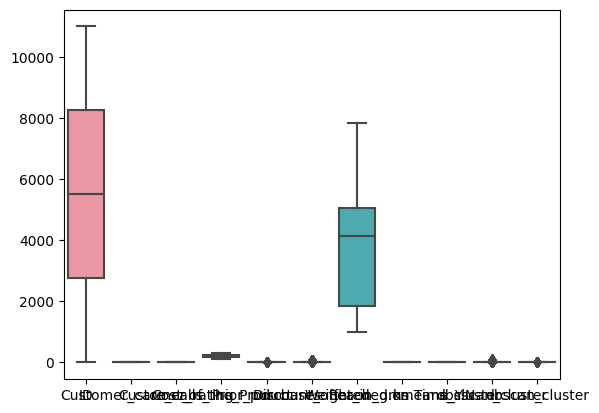

In [164]:

df_clust = df[['Cost_of_the_Product','Weight_in_gms']].copy()#выбрал эти данные так как хочу разбить продукты на кластеры(по цене, и весу)
sns.boxplot(df)# выбросов нет

In [72]:
df_clust.describe()

,Cost_of_the_Product,Weight_in_gms
count,10999.000000,10999.000000
mean,210.196836,3634.016729
std,48.063272,1635.377251
min,96.000000,1001.000000
25%,169.000000,1839.500000
50%,214.000000,4149.000000
75%,251.000000,5050.000000
max,310.000000,7846.000000


<ipython-input-73-441ace8534d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['Cost_of_the_Product'], hist=True, kde=False,


<Axes: xlabel='Cost_of_the_Product'>

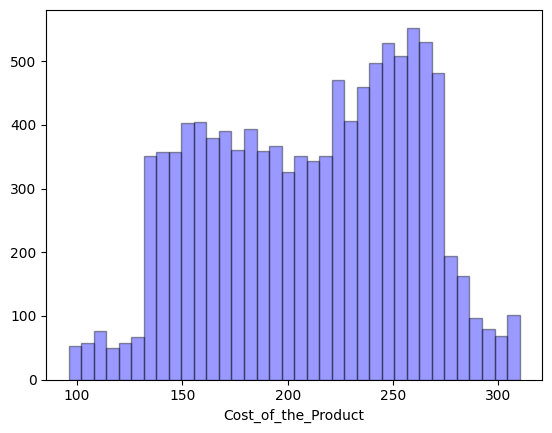

In [73]:
sns.distplot(df_clust['Cost_of_the_Product'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-74-54e53a2df16d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['Weight_in_gms'], hist=True, kde=False,


<Axes: xlabel='Weight_in_gms'>

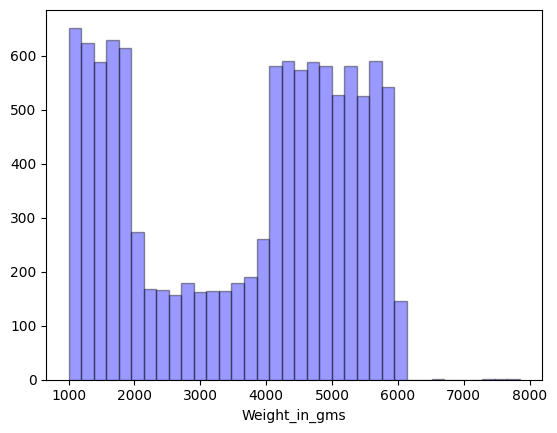

In [74]:
sns.distplot(df_clust['Weight_in_gms'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

У нас не равномерное распределение у веса в грамах и у цены похоже но, но слишком большой рост вверх, поэтому будет использовано мин макс для всех колонок которые были выбраны

In [85]:

min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['Cost_of_the_Product','Weight_in_gms']])
df_clust[['Cost_of_the_Product','Weight_in_gms']] = min_max_scal
df_clust.Cost_of_the_Product.unique()

array([0.37850467, 0.56074766, 0.40654206, 0.37383178, 0.41121495,
       0.30841121, 0.71962617, 0.64018692, 0.25233645, 0.31775701,
       0.43457944, 0.63551402, 0.47663551, 0.8364486 , 0.26168224,
       0.61214953, 0.21962617, 0.6682243 , 0.22897196, 0.30373832,
       0.28037383, 0.53738318, 0.72429907, 0.60280374, 0.35514019,
       0.64485981, 0.79439252, 0.75233645, 0.59345794, 0.24766355,
       0.19158879, 0.39719626, 0.55607477, 0.80841121, 0.20093458,
       0.36448598, 0.25700935, 0.53271028, 0.3411215 , 0.29906542,
       0.43925234, 0.21028037, 0.32242991, 0.34579439, 0.5       ,
       0.70093458, 0.6635514 , 0.45327103, 0.58411215, 0.38785047,
       0.04205607, 0.77102804, 0.4953271 , 0.06074766, 0.28971963,
       0.63084112, 0.51401869, 0.42523364, 0.62616822, 0.07943925,
       0.39252336, 0.1682243 , 0.56542056, 0.47196262, 0.41588785,
       0.85046729, 0.62149533, 0.42056075, 0.88785047, 0.36915888,
       0.57476636, 0.54672897, 0.64953271, 0.81775701, 0.22429

In [76]:
#LabelEncoder не надо так как нет категорических

In [77]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski Harabasz Score 4, с баллом 15045.454351522038
Оптимальное число кластеров Silhouette Score 4, с баллом 0.49559371197284935
Оптимальное число кластеров Davies Bouldin Score 4, с баллом 0.678022699247455


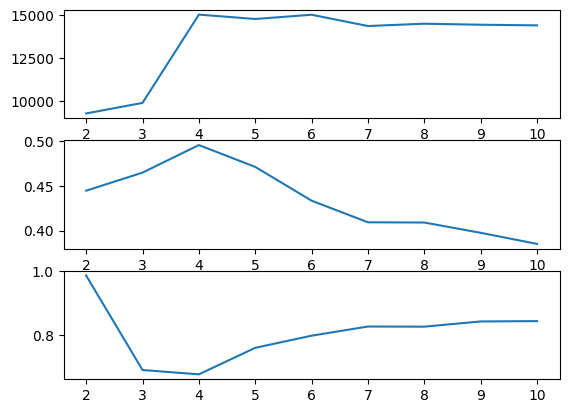

In [86]:

# your_code here
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  score_1.append(calinski_harabasz_score(df_clust,kmeans.labels_))
  score_2.append(silhouette_score(df_clust,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_clust,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)
# plt.show()

Было выбрано 4 кластера так как все метрикм сказали что 4 это оптимальный

In [80]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""
import numpy as np

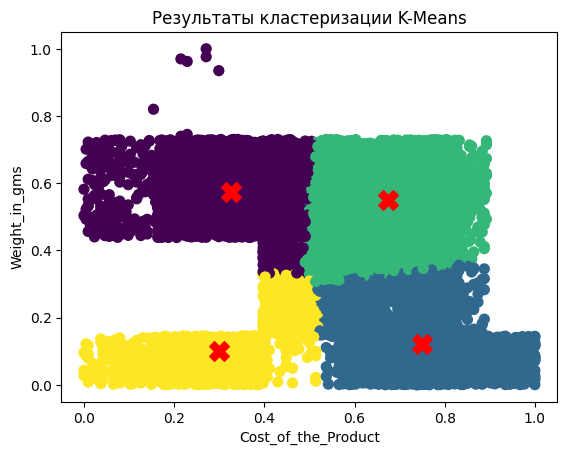

In [87]:
kmeans = KMeans(n_clusters= 4,n_init = 10,random_state = 42)
kmeans.fit(min_max_scal)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_clust['Cost_of_the_Product'], df_clust['Weight_in_gms'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Weight_in_gms')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [69]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

In [89]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')
#я подождал минут 5 и понял что это надолго поэтому данные eps буду брать как у вас в примере

KeyboardInterrupt: ignored

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

[0]


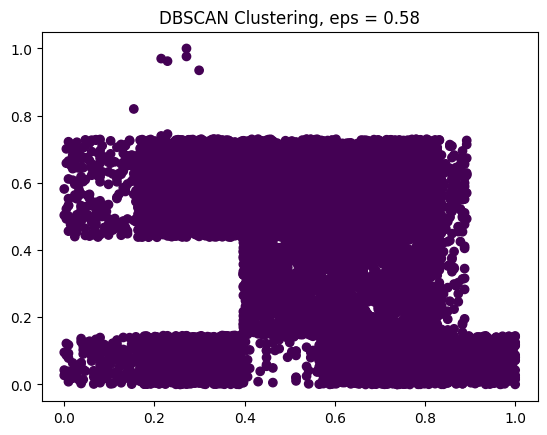

[0]


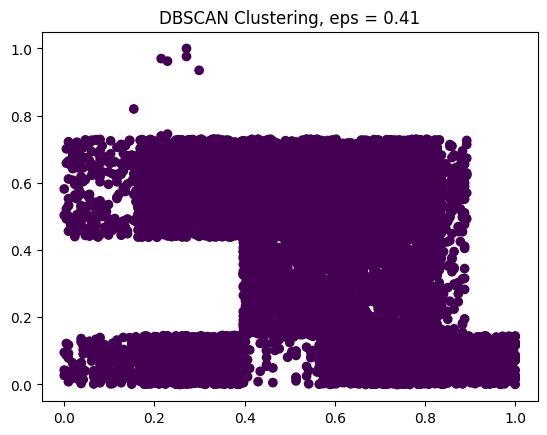

[0]


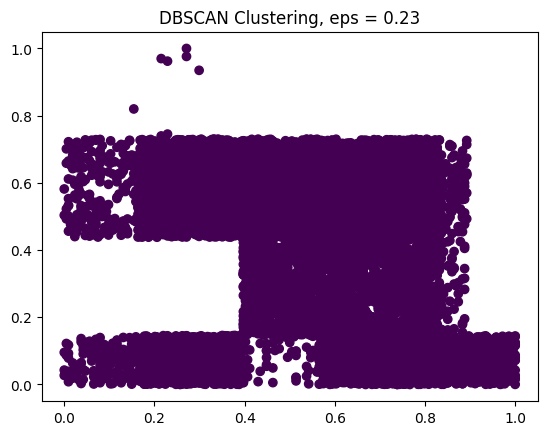

[-1  0  1  2  3  4  5  6  7]


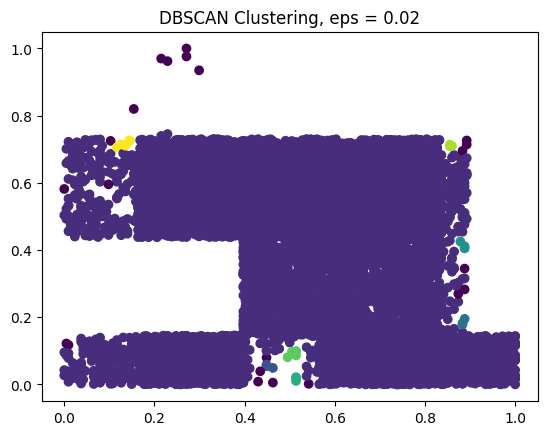

In [136]:
# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике

for eps in [0.58,0.41,0.23,0.02]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(min_max_scal)
  labels_db = dbscan.labels_
  print(np.unique(labels_db))
  # Визуализация результатов, темные точки - выбросы
  plt.scatter(df_clust['Cost_of_the_Product'], df_clust['Weight_in_gms'], c=labels_db, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [94]:
# как я понял данный алгоритм тут плох так как данные очень близко друг к другу находятся

In [97]:
"""
Здесь иерархическая кластеризация и метрики
"""
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [ ]:
# your_code here

In [100]:

score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k,linkage='average')

  clusters = cluster_model.fit(min_max_scal)

  score_2.append(silhouette_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")


Оптимальное число кластеров Silhouette Score 2, с баллом 0.49559371197284935


так как значение меньше чем 0,5 то не реливантно данная метрика(других я не нашел в инернете) поэтому буду строить по 4 как было в means для примера

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

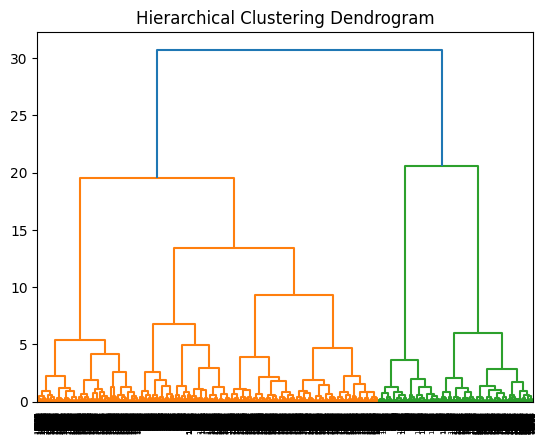

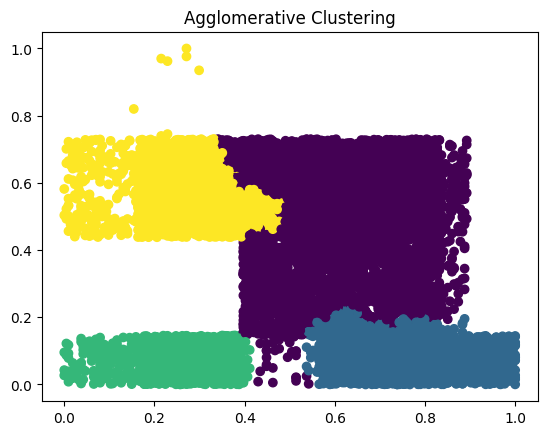

In [101]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(min_max_scal)
linkage_matrix = hierarchy.linkage(min_max_scal, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Визуализация результатов кластеризации
plt.scatter(df_clust['Cost_of_the_Product'], df_clust['Weight_in_gms'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [111]:
!pip install ydata-profiling
!pip uninstall cast_control
!pip install cast_control==0.10.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.1/347.1 kB 19.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.7 MB/s eta 0:00:00
  Created wheel for daemons: filename=daemons-1.3.2-py3-none-any.whl size=21241 sha256=f317830f73489a472d475c77228e58f3e40781b221b1b98abb1e0e1472cbbe01
  Stored in directory: /root/.cache/pip/wheels/21/4d/e2/d7efb9

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [138]:
# your_code here
df['kmeans_cluster'] = cluster_labels
df['dbscan_cluster'] = labels_db
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,kmeans_cluster,dbsscan_cluster,dbscan_cluster
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3,0,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,1,1,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0,2,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,3,0,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,1,13,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,1,13,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,1,13,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,1,13,0


In [130]:
!pip uninstall ydata_profiling
!pip install ydata_profiling
!pip install -U typing_extensions

Found existing installation: ydata-profiling 4.6.1
Uninstalling ydata-profiling-4.6.1:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/bin/ydata_profiling
    /usr/local/lib/python3.10/dist-packages/pandas_profiling/*
    /usr/local/lib/python3.10/dist-packages/ydata_profiling-4.6.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/ydata_profiling/*
Proceed (Y/n)? y
  Successfully uninstalled ydata-profiling-4.6.1
  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl (357 kB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.1
    Uninstalling typing_extensions-4.6.1:
      Successfully uninstalled typing_extensions-4.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extension

In [137]:
# from ydata_profiling import ProfileReport

uniq_labels_dbscan = tuple(set(cluster_labels))
uniq_labels_kmeans = tuple(set(labels_db))
print(uniq_labels_dbscan,uniq_labels_kmeans)

(0, 1, 2, 3) (0, 1, 2, 3, 4, 5, 6, 7, -1)


In [140]:
df_db_0 = df[df.dbscan_cluster == 0]
df_db_1 = df[df.dbscan_cluster == 1]
df_db_2 = df[df.dbscan_cluster == 2]
df_db_3 = df[df.dbscan_cluster == 3]
df_db_4 = df[df.dbscan_cluster == 4]
df_db_5 = df[df.dbscan_cluster == 5]
df_db_6 = df[df.dbscan_cluster == 6]
df_db_7 = df[df.dbscan_cluster == 7]

df_kmeans_0 = df[df.kmeans_cluster == 0]
df_kmeans_1 = df[df.kmeans_cluster == 1]
df_kmeans_2 = df[df.kmeans_cluster == 2]
df_kmeans_3 = df[df.kmeans_cluster == 3]

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

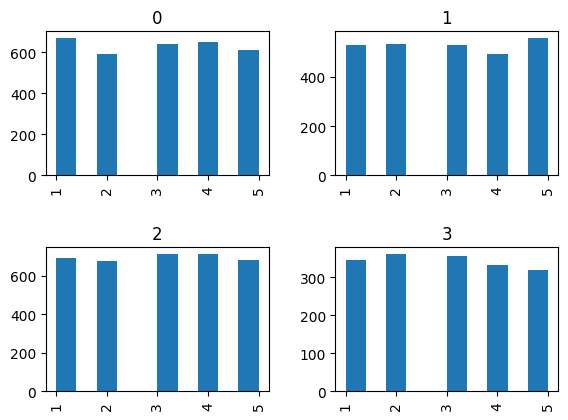

In [153]:
df.hist('Customer_rating', by='kmeans_cluster')# смотрю рейтинг покупателя по кластеру

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

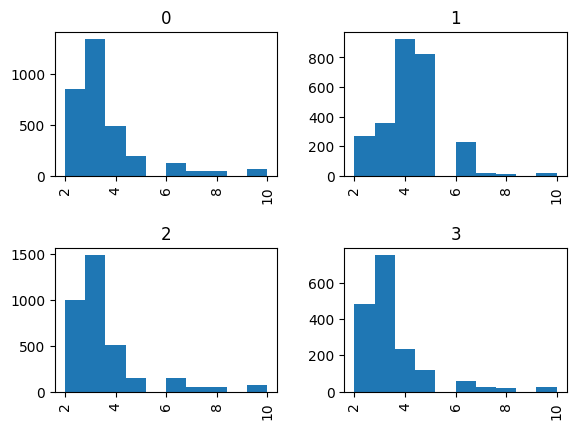

In [152]:
df.hist('Prior_purchases', by='kmeans_cluster')# смотрю кол-во покупок до этого по кластеру

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

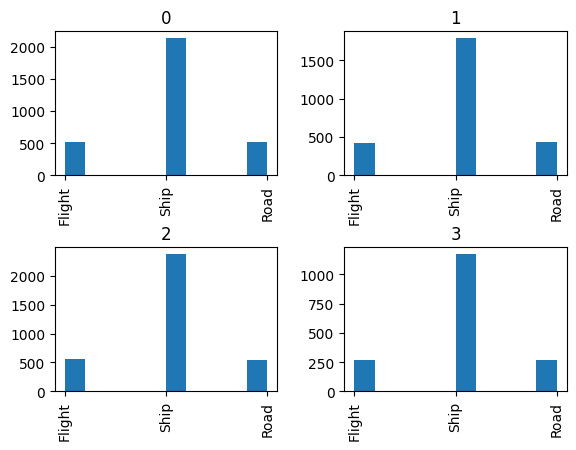

In [156]:
df.hist('Mode_of_Shipment', by='kmeans_cluster')# смотрю кол-во техники(по которой доставляется) по кластеру

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

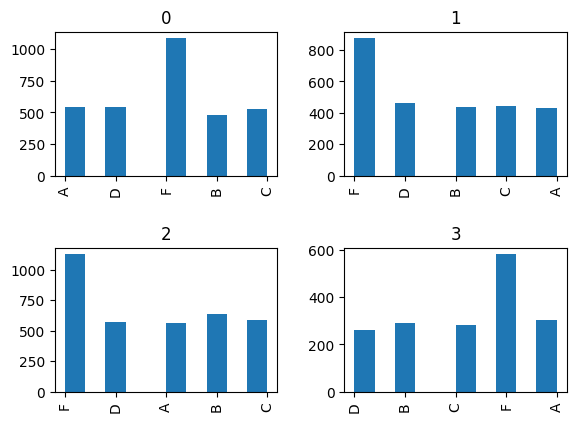

In [155]:

df.hist('Warehouse_block', by='kmeans_cluster')# смотрю кол-во покупок до этого по кластеру

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

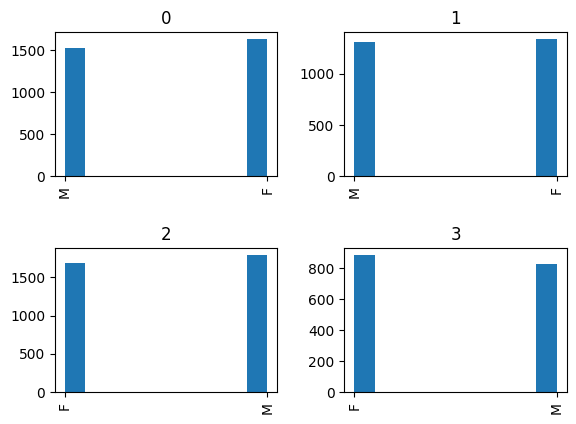

In [158]:
df.hist('Gender', by='kmeans_cluster')

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>]], dtype=object)

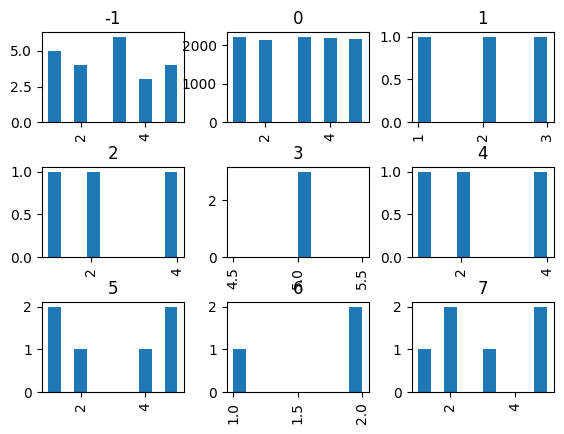

In [159]:
df.hist('Customer_rating', by='dbscan_cluster')# смотрю рейтинг покупателя по кластеру

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>]], dtype=object)

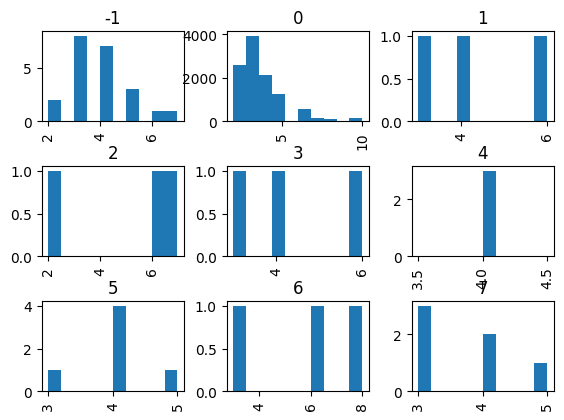

In [160]:
df.hist('Prior_purchases', by='dbscan_cluster')# смотрю кол-во покупок до этого по кластеру

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>]], dtype=object)

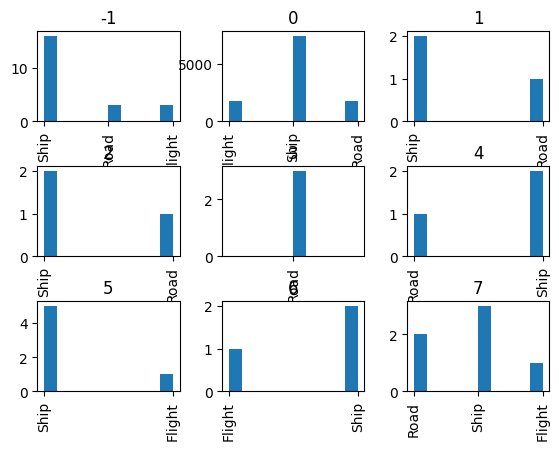

In [161]:
df.hist('Mode_of_Shipment', by='dbscan_cluster')# смотрю кол-во техники(по которой доставляется) по кластеру

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>]], dtype=object)

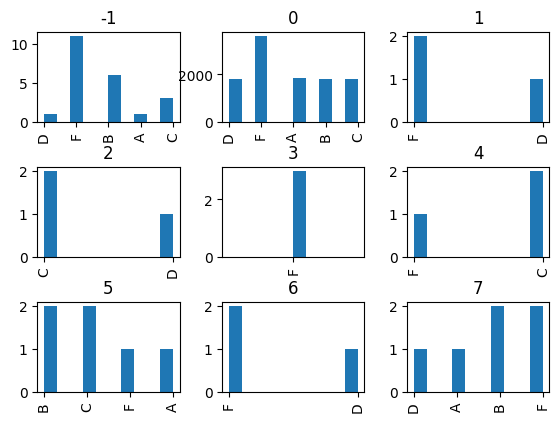

In [162]:
df.hist('Warehouse_block', by='dbscan_cluster')# смотрю кол-во покупок до этого по кластеру

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>]], dtype=object)

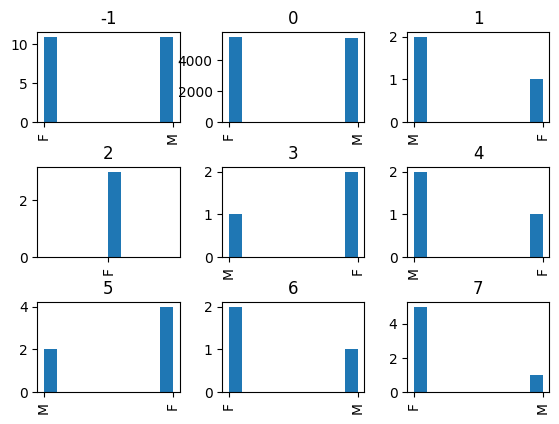

In [163]:
df.hist('Gender', by='dbscan_cluster')

Смотря на эти графики по dbscanжно сказать что различия допустим есть по складному блоку, так как в кластере под индексом 3 только F склад
в половине только 2 склада

а так если смотреть то различий между класстерами среди тех колонок которые мы не брали их нет, а различия между класстерами показаны на графиках которые были построенны при *кластеризации*
и по ним видно что различия как раз состоят в весе и цене

Выполнено за
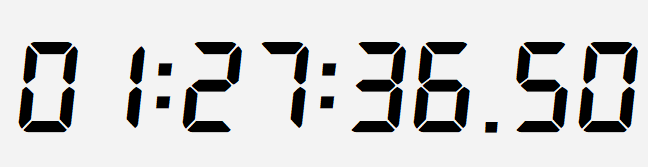